In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [352]:
data=pd.read_csv("titanic-passengers.csv",sep=";")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [354]:
data["Cabin"] = data.Cabin.astype("category").cat.codes
data["Embarked"] = data.Embarked.astype("category").cat.codes
data["Sex"] = data.Sex.astype("category").cat.codes
data["Survived"] = data.Survived.astype("category")

In [355]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int8    
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    int16   
 11  Embarked     891 non-null    int8    
dtypes: category(1), float64(2), int16(1), int64(4), int8(2), object(2)
memory usage: 60.3+ KB


In [356]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [357]:
data["Age"].fillna(data["Age"].mean(),inplace=True)
#data["Embarked"]=data.Embarked.fillna(data.Embarked.mode())
#data["Cabin"]=data.Cabin.fillna(data.Cabin.mode())

In [358]:
data.isnull().sum().sum()

0

In [359]:
from sklearn.model_selection import train_test_split
SEED=15
x = data.drop(["Name","Ticket","Survived","PassengerId"],axis=1)
y = data["Survived"].cat.codes

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=SEED)

In [360]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#applying tree algorithm
model = tree.DecisionTreeClassifier(random_state=SEED)

model.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model

print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.770949720670391


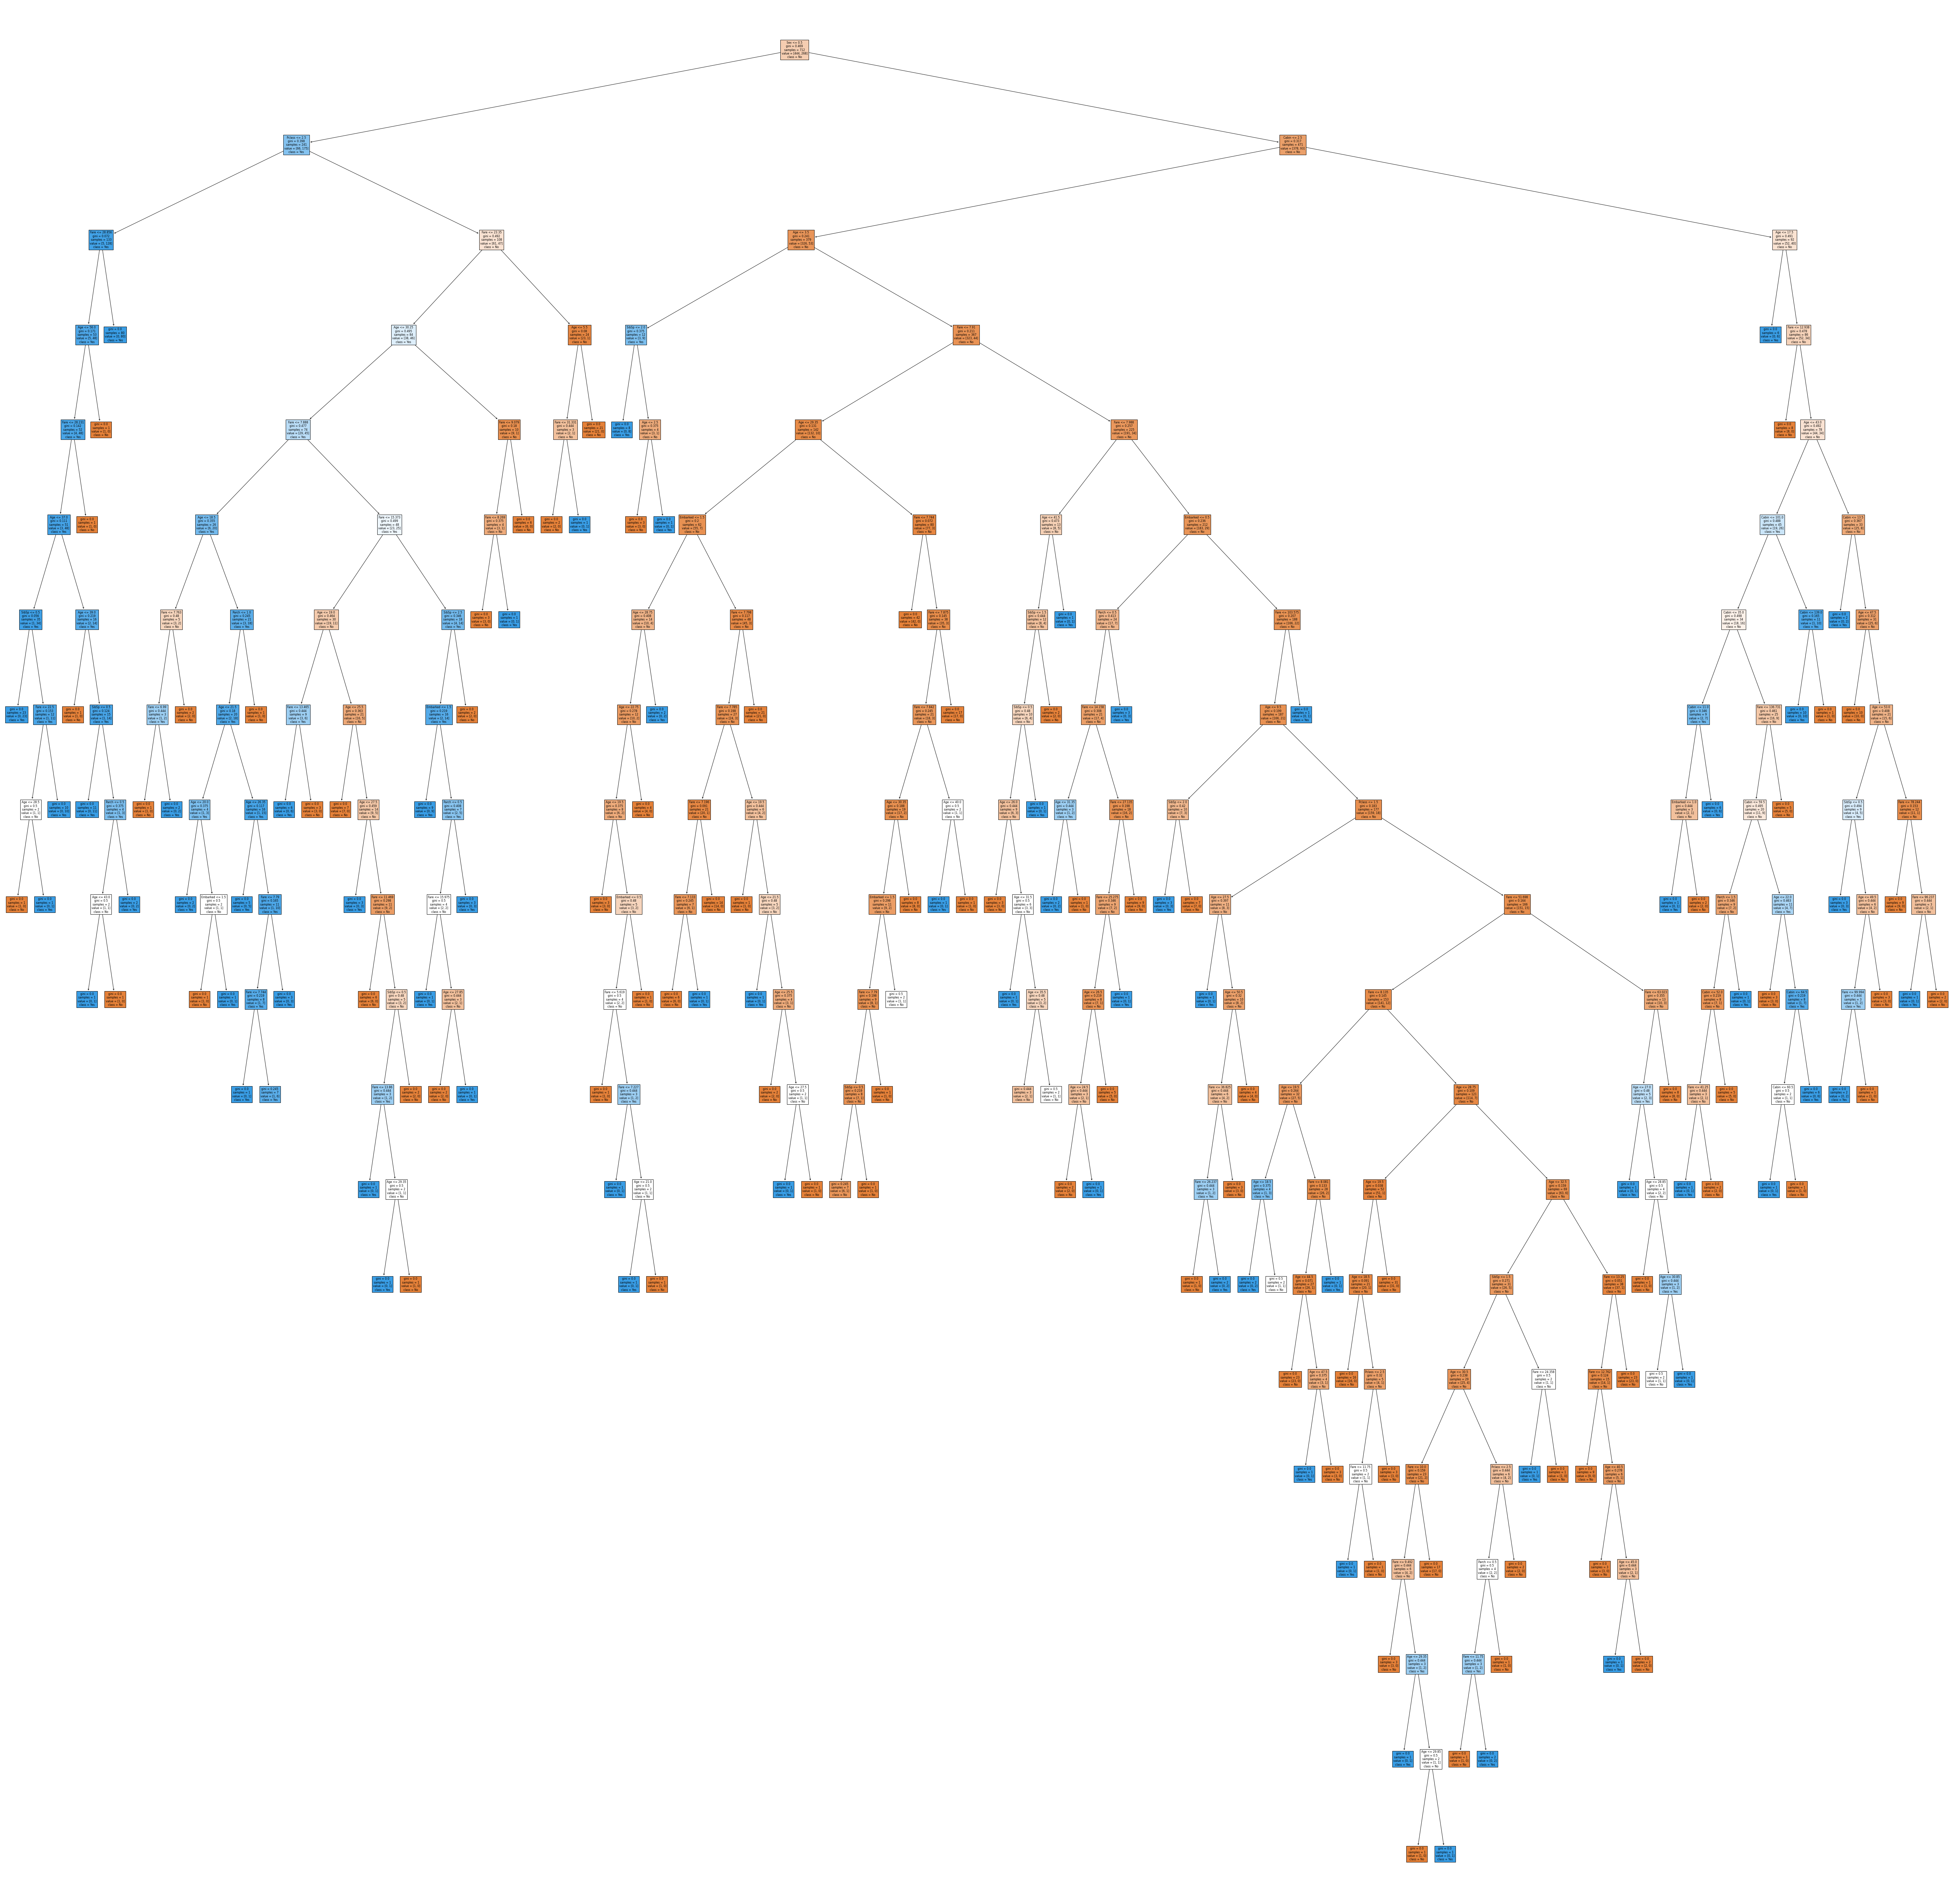

In [361]:
fig = plt.figure(figsize=(100,100))
tree.plot_tree(model, 
                   feature_names=x.columns.values.tolist(),  
                   class_names=data.Survived.unique(),
                   filled=True)
fig.savefig("tree.png")

In [364]:
model1 = tree.DecisionTreeClassifier(min_impurity_split=0.2,max_depth=4,random_state=SEED)  
model1.fit(x_train, y_train)   #fitting our model
y_pred=model1.predict(x_test)   # evaluating our model

print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.8100558659217877


C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


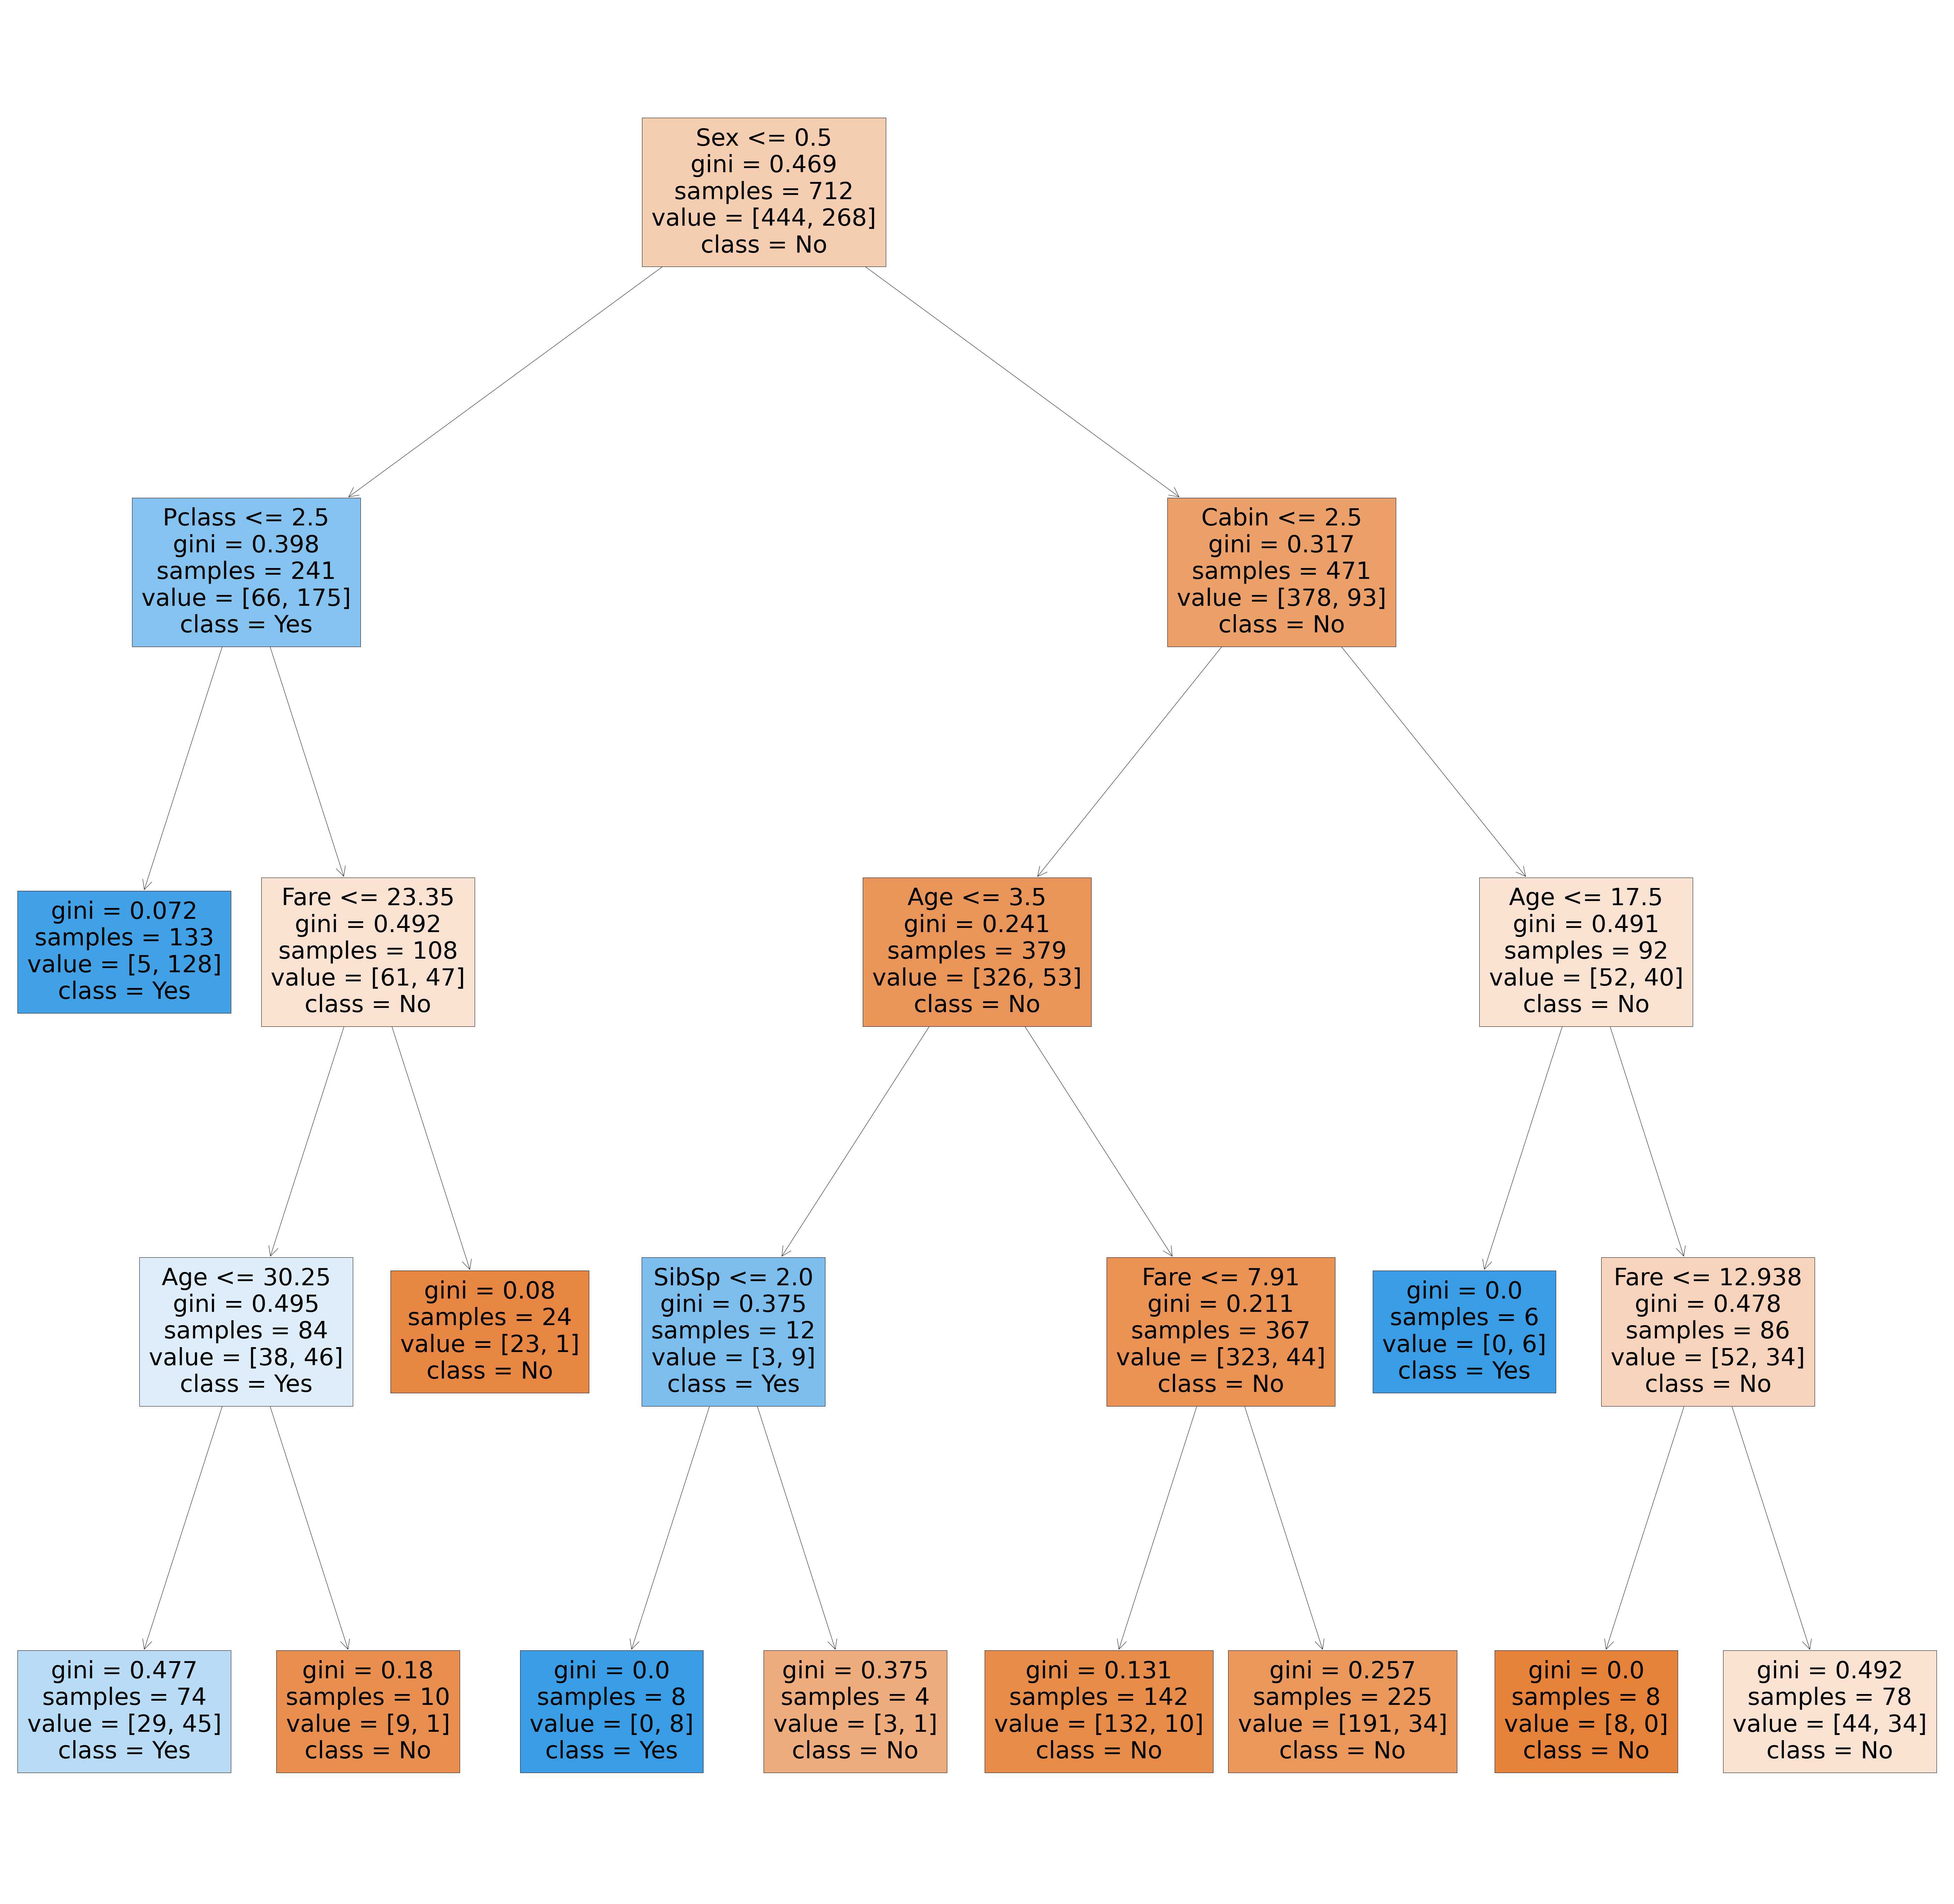

In [365]:
fig = plt.figure(figsize=(100,100))
tree.plot_tree(model1,
                   feature_names=x.columns.values.tolist(),  
                   class_names=data.Survived.unique(),
                   filled=True)
fig.savefig("tree1.png")


the accuracy is batter with 4% after changing the the min_impurity_split and max_depth

# Random Forest

In [385]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [386]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with n decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7653631284916201


In [387]:
clf=RandomForestClassifier(n_estimators=800)  #Creating a random forest with n decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8156424581005587


By changing number of trees in the forest (rasing the number) we were able to gain 4% accuracy to the model 